# Problem:

Problem:
An increase in customer default rates is bad for Credit One since its business is approving customers for loans in the first place. This is likely to result in the loss of Credit One's business customers.

Questions to Investigate:
How do you ensure that customers can/will pay their loans?
Can we approve customers with high certainty?

# Import Dataset to Dataframe

In [1]:
import pandas as pd

In [2]:
credit_df = pd.read_csv('default of credit card clients.csv', header =1)

In [3]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
credit_df.info() #check data types of each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# Prepare Data for Processing

In [6]:
# check for missing data
credit_df.count() #result is same for each variable, so no missing data - e.g. "na" or "nulls"

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

In [7]:
#change "Education" values 0,5,6 to = 4 so only a single value of 4 represents "other"
credit_df = credit_df.replace({'EDUCATION': {0: 4, 5: 4, 6: 4}})

In [8]:
#rename column 'default payment next month' to 'default_next_month' to get rid of spaces in name
credit_df.rename(columns = {'default payment next month':'default_next_month'}, inplace = True)

In [9]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
#change SEX, EDUCATION, MARRIAGE, and 'default_next_month' to nominal data type = 'category' in pandas
convert_dict = {'EDUCATION': 'category',
                'MARRIAGE' : 'category',
                'SEX' : 'category',
                'default_next_month' : 'category'}
credit_df = credit_df.astype(convert_dict) 
print(credit_df.dtypes) 

ID                       int64
LIMIT_BAL                int64
SEX                   category
EDUCATION             category
MARRIAGE              category
AGE                      int64
PAY_0                    int64
PAY_2                    int64
PAY_3                    int64
PAY_4                    int64
PAY_5                    int64
PAY_6                    int64
BILL_AMT1                int64
BILL_AMT2                int64
BILL_AMT3                int64
BILL_AMT4                int64
BILL_AMT5                int64
BILL_AMT6                int64
PAY_AMT1                 int64
PAY_AMT2                 int64
PAY_AMT3                 int64
PAY_AMT4                 int64
PAY_AMT5                 int64
PAY_AMT6                 int64
default_next_month    category
dtype: object


In [11]:
#change "PAY_0"..."PAY_6" to nominal data type = 'category' in pandas
convert_dict = {'PAY_0': 'category',
                'PAY_2' : 'category',
                'PAY_3' : 'category',
                'PAY_4' : 'category',
                'PAY_5' : 'category',
                'PAY_6' : 'category'}
credit_df = credit_df.astype(convert_dict) 
#print(credit_df.dtypes)

In [12]:
#remove the ID column since not needed for analysis
credit_df = credit_df.drop(['ID'], axis=1) # OR credit_df.drop(['ID'], axis=1, inplace = True)
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
#save dataframe to new csv file
credit_df.to_csv('new_credit_df_data.csv', index=False)

# Exploratory Data Analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Obtain column names
header = credit_df.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_next_month'],
      dtype='object')


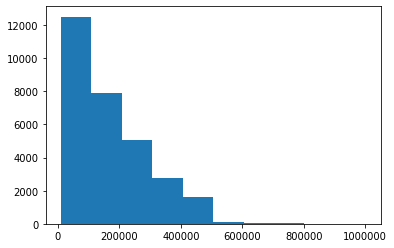

In [16]:
# Create histogram of 'LIMIT_BAL'
plt.hist(credit_df['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

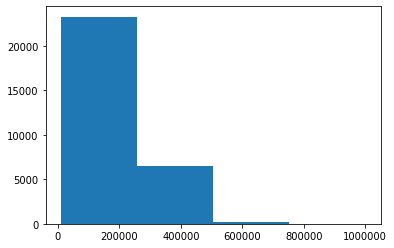

In [17]:
# Plot with 4 bins
plt.hist(credit_df['LIMIT_BAL'], bins=4)

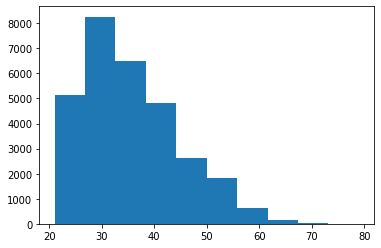

In [18]:
# Create histogram of 'AGE'
plt.hist(credit_df['AGE'])
plt.show()

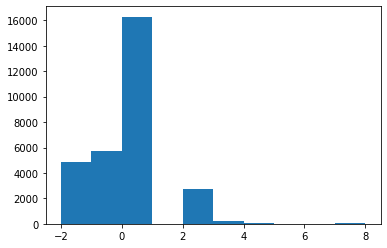

In [19]:
# Create histogram of 'PAY_6' - repayment status for April 2005
plt.hist(credit_df['PAY_6'])
plt.show()

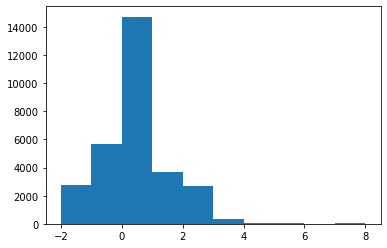

In [20]:
# Create histogram of 'PAY_0' - repayment status for Sept 2005
plt.hist(credit_df['PAY_0'])
plt.show()

Comparing Histogram of PAY_6 and PAY_0 shows a big shift to the "1" category = payment delay for 1 month.

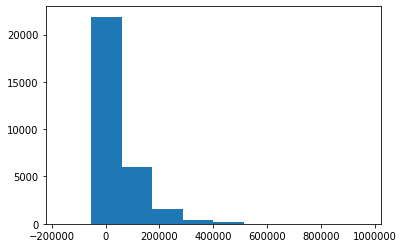

In [21]:
# Create histogram of 'BILL_AMT1' - bill for Sept 2005
plt.hist(credit_df['BILL_AMT1'])
plt.show()

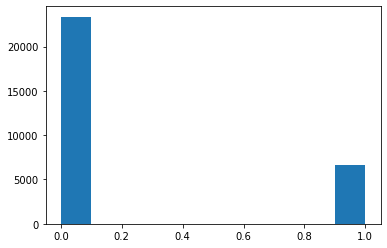

In [22]:
# Create histogram of 'default_next_month'
plt.hist(credit_df['default_next_month'])
plt.show()

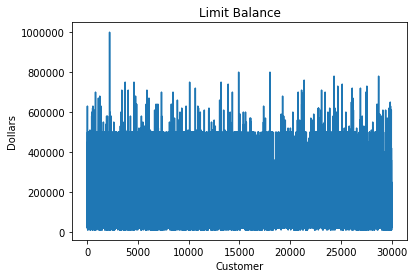

In [23]:
# Line plot of 'LIMIT_BAL'
plt.plot(credit_df['LIMIT_BAL'])
plt.title("Limit Balance")
plt.xlabel("Customer")
plt.ylabel("Dollars")
plt.show()

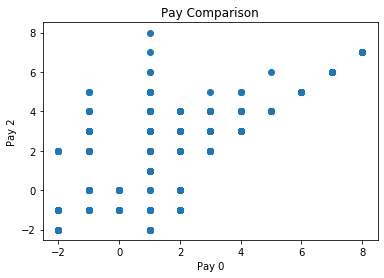

In [24]:
# Scatterplot
x = credit_df['PAY_0']
y = credit_df['PAY_2']
plt.title("Pay Comparison")
plt.xlabel("Pay 0")
plt.ylabel("Pay 2")
plt.scatter(x,y)
plt.show()

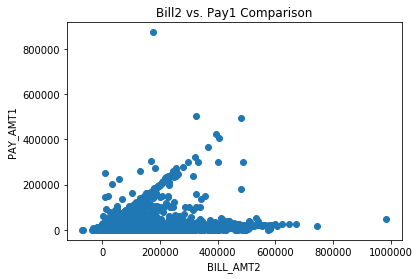

In [25]:
# Scatterplot
x = credit_df['BILL_AMT2']
y = credit_df['PAY_AMT1']
plt.title("Bill2 vs. Pay1 Comparison")
plt.xlabel("BILL_AMT2")
plt.ylabel("PAY_AMT1")
plt.scatter(x,y)
plt.show()

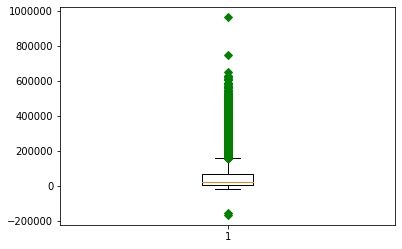

In [26]:
A = credit_df['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

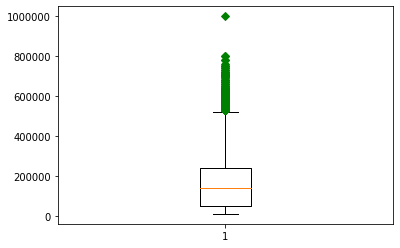

In [27]:
A = credit_df['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

In [28]:
# a basic correlation coefficient matrix using pandas:
corrMat = credit_df.corr()
print(corrMat)

           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   
BILL_AMT5   0.295562  0.049345   0.829779   0.859778   0.883910   0.940134   
BILL_AMT6   0.290389  0.047613   0.802650   0.831594   0.853320   0.900941   
PAY_AMT1    0.195236  0.026147   0.140277   0.280365   0.244335   0.233012   
PAY_AMT2    0.178408  0.021785   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  0.029247   0.156887   0.150718   0.130011   0.300023   
PAY_AMT4    0.203242  0.021379   0.158303   0.147398   0.143405 

In [29]:
# calculate covariance in Pandas
covMat = credit_df.cov()
print(covMat)

              LIMIT_BAL            AGE     BILL_AMT1     BILL_AMT2  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_AMT1  2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_AMT4  2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_AMT5  2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_AMT6  2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAY_AMT1   4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAY_AMT2   5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAY_AMT3   4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAY_AMT4   4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAY_AMT5   4.305657e+08    3218.052172  1.879091e+08  1.717652e+08   
PAY_AMT6   5.065153e

# EDA continued...

In [30]:
# import needed libraries (some already imported, but done again for completeness/reuse for other projects)
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Number of customers next month default status: default (1) vs. not default (0)
credit_df.groupby('default_next_month')['default_next_month'].count()

default_next_month
0    23364
1     6636
Name: default_next_month, dtype: int64

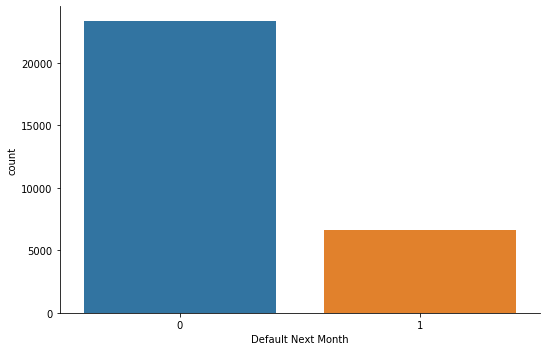

In [32]:
# Instead of a group by, use seaborn to plot the count of customers default status
fg = sns.catplot('default_next_month', data=credit_df, kind='count', aspect=1.5)
fg.set_xlabels('Default Next Month')

In [33]:
# Explore data by Sex 1 = male, 2=female
credit_df.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

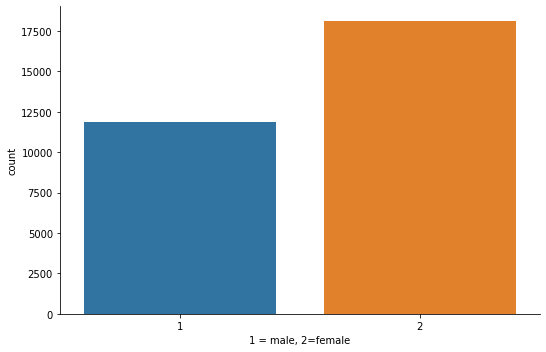

In [34]:
fg = sns.catplot('SEX', data=credit_df, kind='count', aspect=1.5)
fg.set_xlabels('1 = male, 2=female')

In [35]:
# Number of men and women in each of the default status
credit_df.groupby(['SEX', 'default_next_month'])['SEX'].count()

SEX  default_next_month
1    0                      9015
     1                      2873
2    0                     14349
     1                      3763
Name: SEX, dtype: int64

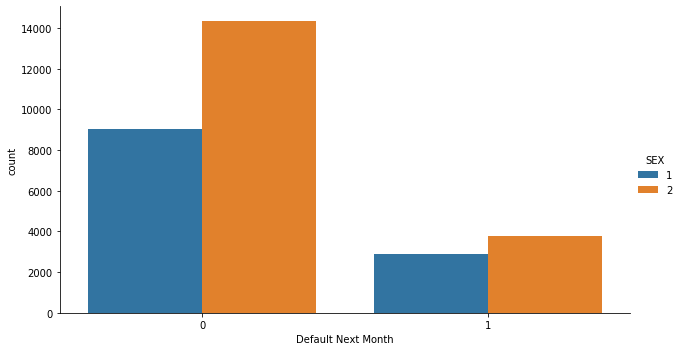

In [36]:
# Again use seaborn to group by Sex and default status
g = sns.catplot('default_next_month', data=credit_df, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Default Next Month')

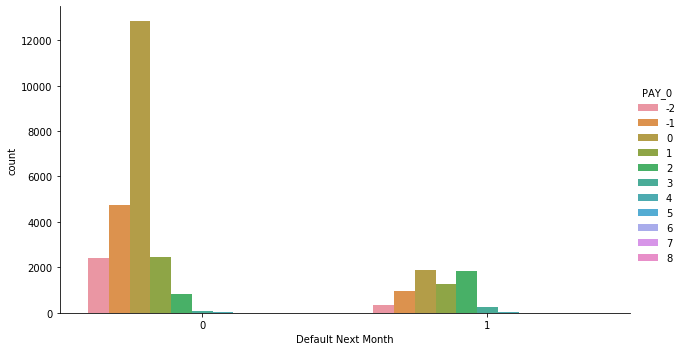

In [159]:
# Again use seaborn to group by PAY_0 and default status
g = sns.catplot('default_next_month', data=credit_df, hue='PAY_0', kind='count', aspect=1.75)
g.set_xlabels('Default Next Month')

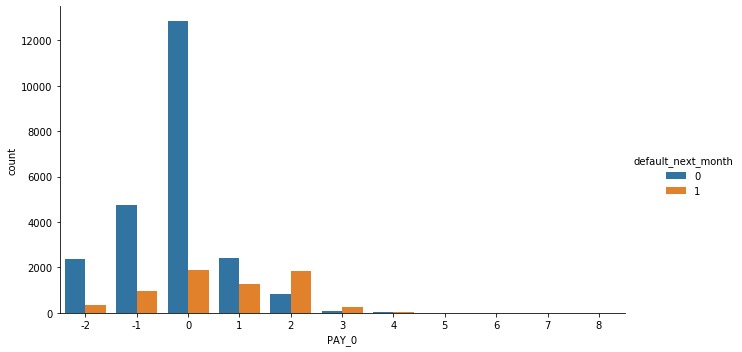

In [160]:
# Flip them for a different view
g = sns.catplot('PAY_0', data=credit_df, hue='default_next_month', kind='count', aspect=1.75)
g.set_xlabels('PAY_0')

Shows that ~1/3 of borrowers with PAY_0=1 (payment delayed one month) default the next month. Also, ~2/3 of borrowers with PAY_0=2 (payment delayed two months) or PAY_0=3 default the next month.

In [37]:
# Explore data by Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others
credit_df.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64

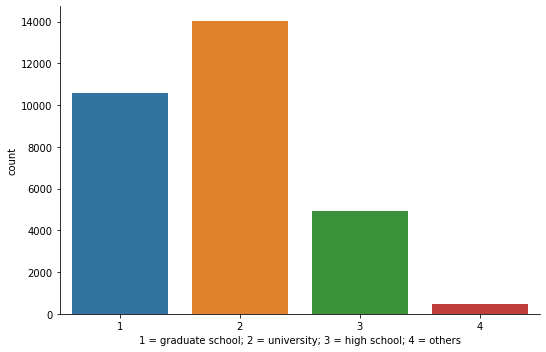

In [38]:
fg = sns.catplot('EDUCATION', data=credit_df, kind='count', aspect=1.5)
fg.set_xlabels('1 = graduate school; 2 = university; 3 = high school; 4 = others')

In [39]:
# Number of customers who defaulted in each education-level grouped by sex.
# Also total was found for each education level grouped by sex.
# First, convert 'default_next_month' back to 'int64' so "aggfunc=np.sum" will work in pivot_table

convert_dict = {'default_next_month' : 'int64'}
credit_df = credit_df.astype(convert_dict) 
print(credit_df.dtypes) 


credit_df.pivot_table('default_next_month', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

LIMIT_BAL                int64
SEX                   category
EDUCATION             category
MARRIAGE              category
AGE                      int64
PAY_0                 category
PAY_2                 category
PAY_3                 category
PAY_4                 category
PAY_5                 category
PAY_6                 category
BILL_AMT1                int64
BILL_AMT2                int64
BILL_AMT3                int64
BILL_AMT4                int64
BILL_AMT5                int64
BILL_AMT6                int64
PAY_AMT1                 int64
PAY_AMT2                 int64
PAY_AMT3                 int64
PAY_AMT4                 int64
PAY_AMT5                 int64
PAY_AMT6                 int64
default_next_month       int64
dtype: object


EDUCATION,1,2,3,4,All
SEX,,,,,
1,906,1408,545,14,2873
2,1130,1922,692,19,3763
All,2036,3330,1237,33,6636


In [40]:
not_defaulted = credit_df[credit_df['default_next_month']==0]

In [41]:
# Total number of customers that defaulted
len(not_defaulted)

23364

In [42]:
# Customers that defaulted and didn't default grouped by Education and Sex
table = pd.crosstab(index=[credit_df.default_next_month,credit_df.EDUCATION], columns=[credit_df.SEX])

In [43]:
table.unstack()

SEX                    1                      2                 
EDUCATION              1     2     3    4     1     2     3    4
default_next_month                                              
0                   3448  3966  1445  156  5101  6734  2235  279
1                    906  1408   545   14  1130  1922   692   19

Worst ratios are sex=1, educ=2 (males with univ. ed) at 1408/(3966+1408)=26%, then sex=2, educ=2 (females with univ. ed) at 1922/(6734+1922)=22%

In [44]:
# Customers that defaulted and didn't default grouped by Marriage and Sex
table_mar_sex = pd.crosstab(index=[credit_df.default_next_month,credit_df.MARRIAGE], columns=[credit_df.SEX])
table_mar_sex.unstack()

SEX                  1                   2                 
MARRIAGE             0     1     2   3   0     1     2    3
default_next_month                                         
0                   12  3844  5068  91  37  6609  7555  148
1                    2  1346  1485  40   3  1860  1856   44

Worst ratio is sex=1, marriage=1 (males that are married) at 1346/(3844+1346)=26%

In [45]:
# Customers that defaulted and didn't default grouped by Education and Marriage
table_mar = pd.crosstab(index=[credit_df.default_next_month,credit_df.EDUCATION], columns=[credit_df.MARRIAGE])
table_mar.unstack()

MARRIAGE            0               1                      2                   \
EDUCATION           1  2   3  4     1     2     3    4     1     2     3    4   
default_next_month                                                              
0                   4  5  40  0  2953  5176  2107  217  5555  5401  1457  210   
1                   0  1   4  0   769  1666   754   17  1254  1619   452   16   

MARRIAGE             3              
EDUCATION            1    2   3  4  
default_next_month                  
0                   37  118  76  8  
1                   13   44  27  0

In [46]:
print('Average and median age of customers are %0.f and %0.f years old, respectively'%(credit_df.AGE.mean(), 
                                                                          credit_df.AGE.median()))

Average and median age of customers are 35 and 34 years old, respectively


In [47]:
credit_df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, "Distribution of Customers' Ages")

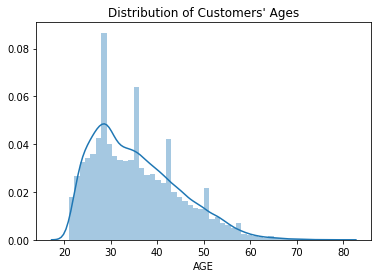

In [48]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(credit_df.AGE)
age_dist.set_title("Distribution of Customers' Ages")

Most customers are young to middle-aged (e.g. 20-40)

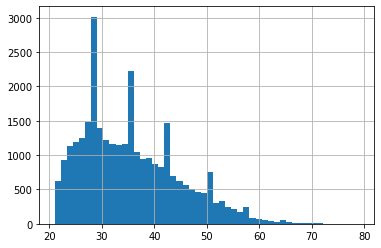

In [49]:
# Another way to plot a histogram of ages is shown below
credit_df['AGE'].hist(bins=50)

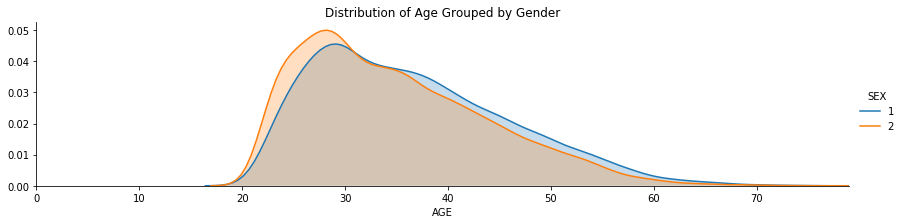

In [50]:
# kde plot Distribution of Customers' Ages Grouped by Gender
fig = sns.FacetGrid(credit_df, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

Female customers are slightly younger than males

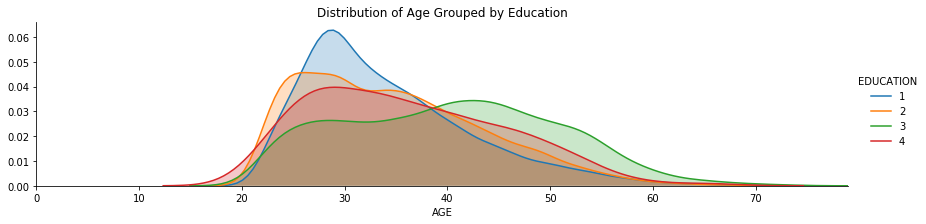

In [51]:
# kde plot Distribution of Customers' Ages Grouped by Education
fig = sns.FacetGrid(credit_df, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Education')
fig.add_legend()

## factors affecting defaulting

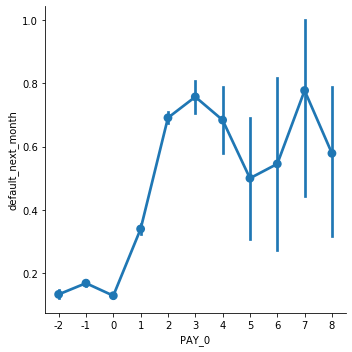

In [171]:
# Defaulted vs. Education Grouped by gender
sns.factorplot('PAY_0','default_next_month', data=credit_df)

Shows the amount of increase in defaults as the PAY_0 value increases in months of payment delays

/Users/clark/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


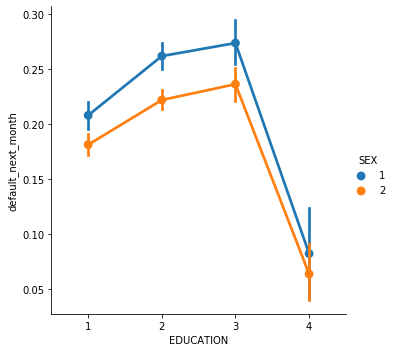

In [52]:
# Defaulted vs. Education Grouped by gender
sns.factorplot('EDUCATION','default_next_month', hue='SEX', data=credit_df)

Females are less likely to default regardless of education level, with the largest difference at the university (2) and high school (3) levels.

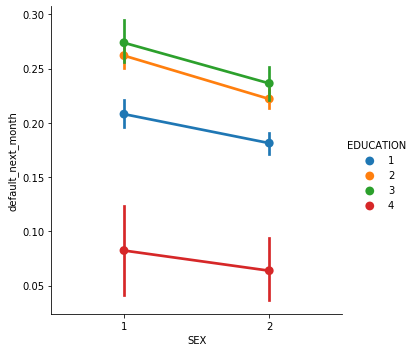

In [53]:
# Defaulted vs. gender Grouped by Education
sns.factorplot('SEX','default_next_month', hue='EDUCATION', data=credit_df)

Shows order of most likely to default by education level regardles of sex: high school, university, graduate school, others

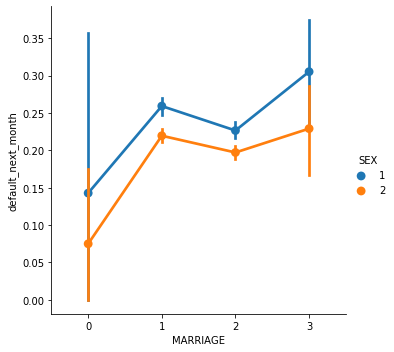

In [54]:
# Defaulted vs. Marriage Grouped by gender
sns.factorplot('MARRIAGE','default_next_month', hue='SEX', data=credit_df)

Females are less likely to default regardless of marital status.

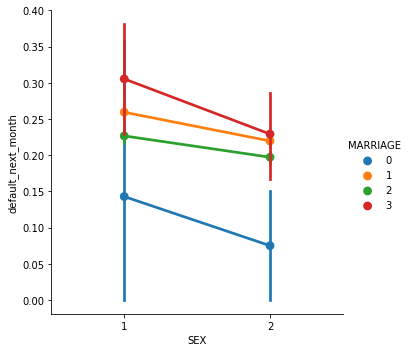

In [55]:
sns.factorplot('SEX','default_next_month', hue='MARRIAGE', data=credit_df)

Shows order of most likely to default by marrital status regardles of sex: divorce, married, single, others

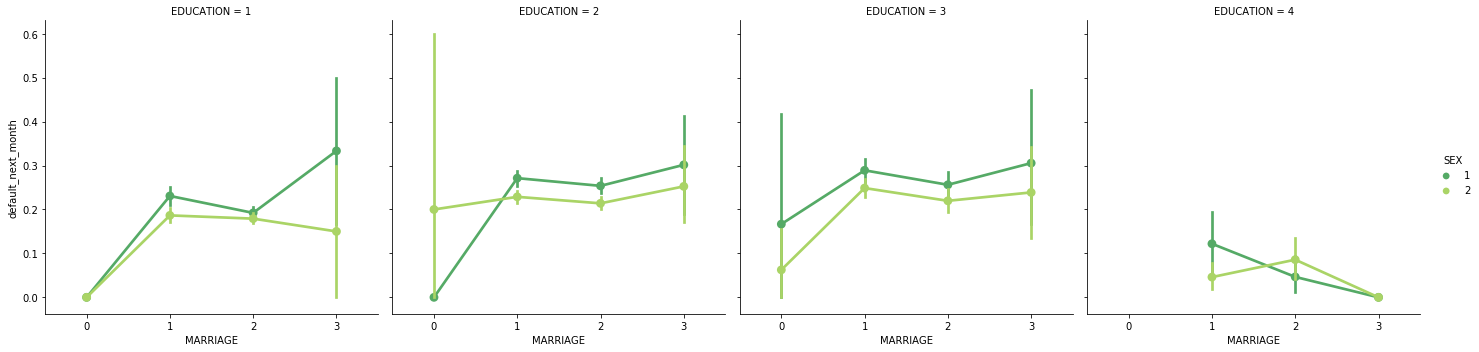

In [56]:
# Lets split Marriage by Education
sns.factorplot('MARRIAGE', 'default_next_month', data=credit_df, palette='summer', hue='SEX', 
               col='EDUCATION', col_order=[1,2,3,4])

## BILL_AMT1 Factor

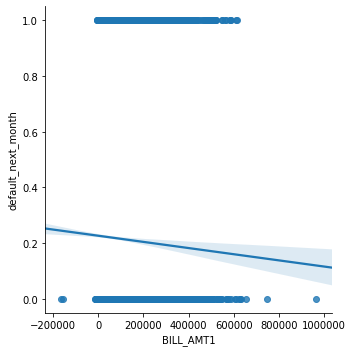

In [165]:
# Linear plot of age vs. default
sns.lmplot('BILL_AMT1', 'default_next_month', data=credit_df)

## Age Factor

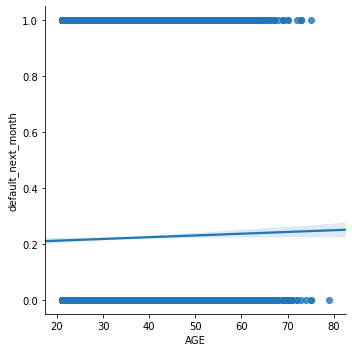

In [57]:
# Linear plot of age vs. default
sns.lmplot('AGE', 'default_next_month', data=credit_df)

Slight linear trend between age and defaulting

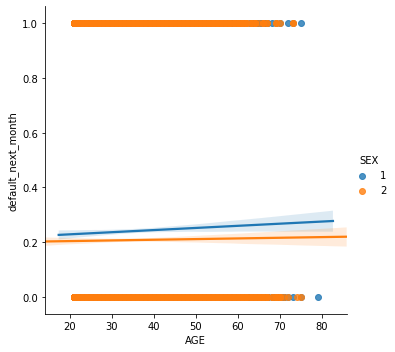

In [58]:
# defaulting vs. Age grouped by Sex
sns.lmplot('AGE', 'default_next_month', data=credit_df, hue='SEX')

More of a relationship of age to default for males than females

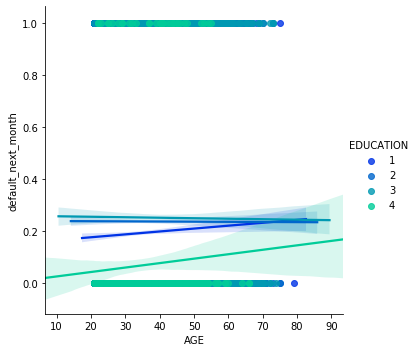

In [59]:
# defaulted vs. Age grouped by Education
sns.lmplot('AGE', 'default_next_month', hue='EDUCATION', data=credit_df, palette='winter', hue_order=range(1,5))

Chance of defaulting increased with age for Education = other and graduate school, whereas no relationship or slightly down for university and high school

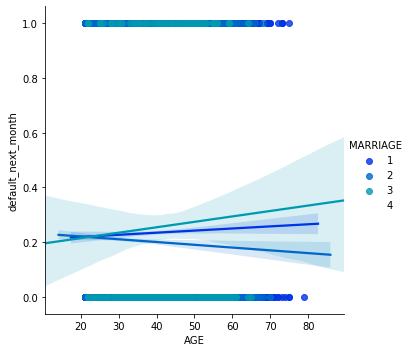

In [60]:
# defaulted vs. Age gruped by Marriage
sns.lmplot('AGE', 'default_next_month', hue='MARRIAGE', data=credit_df, palette='winter', hue_order=range(1,5))

Chance of defaulting increased with age for Marriage = divorce and married, whereas decreased for single (no plot for other)

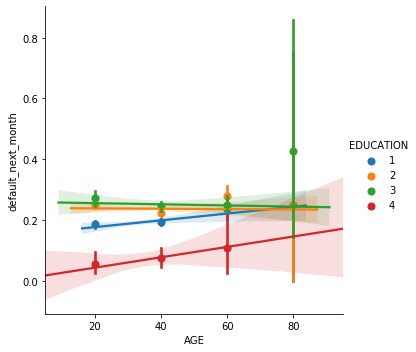

In [61]:
# Create a generation bin
generations = [10,20,40,60,80]
sns.lmplot('AGE','default_next_month',hue='EDUCATION',data=credit_df,x_bins=generations, hue_order=[1,2,3,4])

# FEATURE ENGINEERING

## Remove correlated features

From the correlation matrix above, BILL_AMT1 thru BILL_AMT6 are highly correlated to each other (ranging from 0.8 to 0.95). So need to remove all but one to avoid overfitting. Will leave the feature that has the highest correlation to the dependent variable.

In [62]:
# Here's a method to find all features with correlations > 0.8:
correlated_features = set()
correlation_matrix = credit_df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print("Features with correlation coefficient > 0.8:", correlated_features)

Features with correlation coefficient > 0.8: {'BILL_AMT4', 'BILL_AMT6', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT2'}


In [63]:
#change 'default_next_month' to int64 to include in the correlation matrix
convert_dict = {'default_next_month' : 'int64'}
credit_df = credit_df.astype(convert_dict) 
print(credit_df.default_next_month.dtypes)

int64


In [64]:
# a basic correlation coefficient matrix using pandas:
corrMat = credit_df.corr()
print(corrMat)

                    LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
LIMIT_BAL            1.000000  0.144713   0.285430   0.278314   0.283236   
AGE                  0.144713  1.000000   0.056239   0.054283   0.053710   
BILL_AMT1            0.285430  0.056239   1.000000   0.951484   0.892279   
BILL_AMT2            0.278314  0.054283   0.951484   1.000000   0.928326   
BILL_AMT3            0.283236  0.053710   0.892279   0.928326   1.000000   
BILL_AMT4            0.293988  0.051353   0.860272   0.892482   0.923969   
BILL_AMT5            0.295562  0.049345   0.829779   0.859778   0.883910   
BILL_AMT6            0.290389  0.047613   0.802650   0.831594   0.853320   
PAY_AMT1             0.195236  0.026147   0.140277   0.280365   0.244335   
PAY_AMT2             0.178408  0.021785   0.099355   0.100851   0.316936   
PAY_AMT3             0.210167  0.029247   0.156887   0.150718   0.130011   
PAY_AMT4             0.203242  0.021379   0.158303   0.147398   0.143405   
PAY_AMT5    

All values are very similar. Will keep BILL_AMT1 and remove BILL_AMT2 thru BILL_AMT6 to avoid overfitting.

In [65]:
# Remove BILL_AMT2 thru BILL_AMT6 contained in set "correlated_features"
# create a "cleaned" dataframe so the original dataframe can be used for comparison (if needed)
credit_cl_df = credit_df.drop(list(correlated_features), axis=1)
credit_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
LIMIT_BAL             30000 non-null int64
SEX                   30000 non-null category
EDUCATION             30000 non-null category
MARRIAGE              30000 non-null category
AGE                   30000 non-null int64
PAY_0                 30000 non-null category
PAY_2                 30000 non-null category
PAY_3                 30000 non-null category
PAY_4                 30000 non-null category
PAY_5                 30000 non-null category
PAY_6                 30000 non-null category
BILL_AMT1             30000 non-null int64
PAY_AMT1              30000 non-null int64
PAY_AMT2              30000 non-null int64
PAY_AMT3              30000 non-null int64
PAY_AMT4              30000 non-null int64
PAY_AMT5              30000 non-null int64
PAY_AMT6              30000 non-null int64
default_next_month    30000 non-null int64
dtypes: category(9), int64(10)
memory usage: 2.

In [66]:
credit_cl_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0


In [67]:
#change 'default_next_month' back to category type in both dataframes
#convert_dict = {'default_next_month' : 'category'}
#credit_df = credit_df.astype(convert_dict) 
#print(credit_df.default_next_month.dtypes)
#credit_cl_df = credit_cl_df.astype(convert_dict) 
#print(credit_cl_df.default_next_month.dtypes)

## Feature Selection using Recursive Feature Elimination (RFE)

For RFE: declare two variables — X and target where first represents all the features, and the second represents the target variable. Make an instance of the Machine learning algorithm - e.g. RandomForest. Pass it a random state seed for reproducibility. Create an instance of RFECV, here the needed arguments are:
1. estimator — your model instance
2. step — number of features to remove at each iteration
3. cv — your Cross-Validation, use StratifiedKFold and set K to 10
4. scoring — scoring metric, what you want to optimize for. I’ve used ‘accuracy’ but you can select any other

In [68]:
#scipy, etc.
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold

#for RFECV
from sklearn.feature_selection import RFECV

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import cross_validate

In [69]:
X = credit_cl_df.drop('default_next_month', axis=1)
target = credit_cl_df['default_next_month']

rfc = RandomForestClassifier(random_state=101, n_jobs=-1)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [70]:
# see how many features are optimal to produce the best accuracy (or whatever chosen metric is used)
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 10


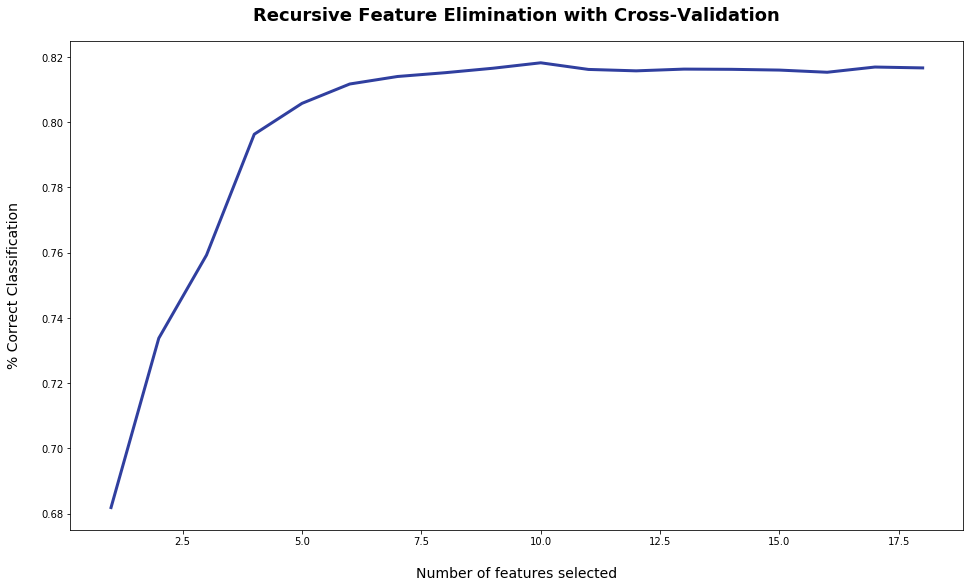

In [71]:
#plot the accuracy obtained with every number of features used
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [72]:
#features considered to be least important
print(np.where(rfecv.support_ == False)[0])
#drop those features:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 1  2  3  6  7  8  9 10]


In [73]:
rfecv.estimator_.feature_importances_

array([0.09113906, 0.10620315, 0.16369605, 0.1255342 , 0.09723091,
       0.09067051, 0.08491133, 0.08030652, 0.08116725, 0.07914104])

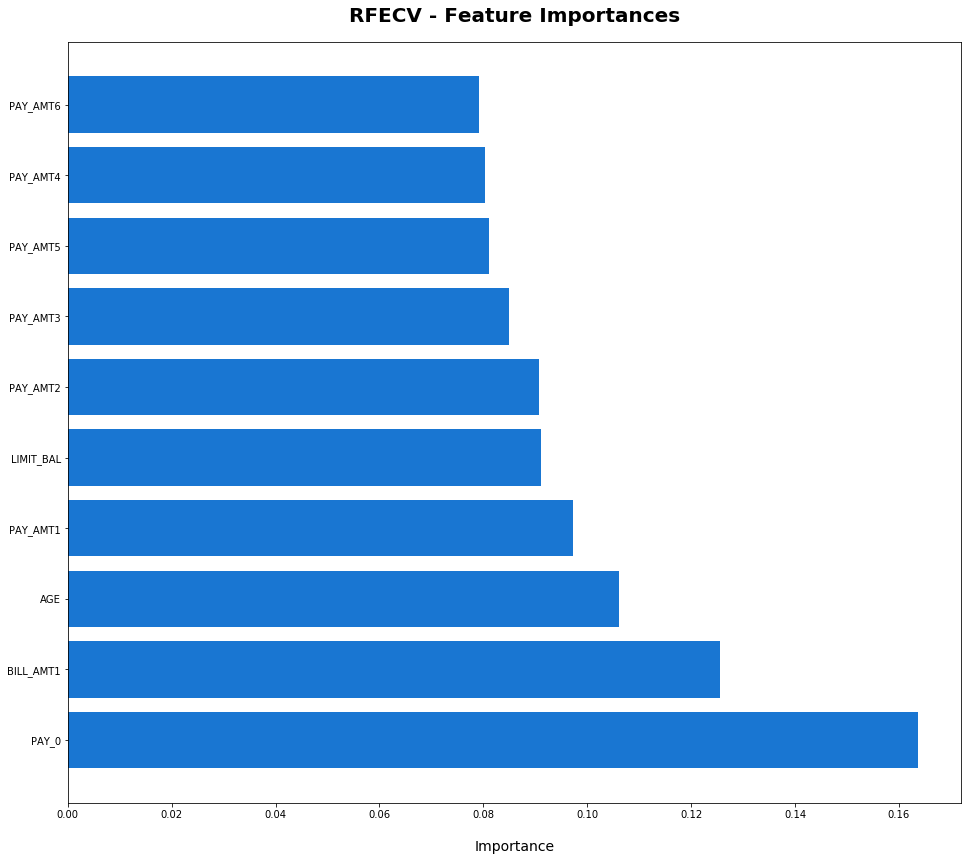

In [74]:
# Plot the importance of the features to keep
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [75]:
#drop RFE least important features from the dataset
credit_cl_df.drop(credit_cl_df.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
credit_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
LIMIT_BAL             30000 non-null int64
AGE                   30000 non-null int64
PAY_0                 30000 non-null category
BILL_AMT1             30000 non-null int64
PAY_AMT1              30000 non-null int64
PAY_AMT2              30000 non-null int64
PAY_AMT3              30000 non-null int64
PAY_AMT4              30000 non-null int64
PAY_AMT5              30000 non-null int64
PAY_AMT6              30000 non-null int64
default_next_month    30000 non-null int64
dtypes: category(1), int64(10)
memory usage: 2.3 MB


In [76]:
credit_cl_df.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,20000,24,2,3913,0,689,0,0,0,0,1
1,120000,26,-1,2682,0,1000,1000,1000,0,2000,1
2,90000,34,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,37,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,57,-1,8617,2000,36681,10000,9000,689,679,0


# Classification

## Create Train and Test Sets of Data

Training Data is divided into two parts: X-train and y_train. Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# Select Features by dropping the dependent variable
features = credit_cl_df.drop('default_next_month', axis=1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,3913,0,689,0,0,0,0
1,120000,26,-1,2682,0,1000,1000,1000,0,2000
2,90000,34,0,29239,1518,1500,1000,1000,1000,5000
3,50000,37,0,46990,2000,2019,1200,1100,1069,1000
4,50000,57,-1,8617,2000,36681,10000,9000,689,679


In [79]:
# Select Dependent Variable
depVar = credit_cl_df['default_next_month']

In [80]:
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
14859,30000,34,-1,9318,10621,15685,5827,0,0,0
11801,20000,22,0,8392,0,1000,1828,1500,0,3000
6415,80000,47,0,52690,2022,1711,1584,1576,1690,1285
12369,20000,42,2,18155,0,2344,800,683,0,1500
15739,80000,27,-1,993,1528,1499,4130,0,1404,1621


In [81]:
x_train.shape

(24000, 10)

In [82]:
x_test.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
14072,320000,43,-1,18625,10000,5000,0,0,0,0
7515,340000,38,-2,0,780,0,0,0,0,0
9023,30000,27,1,29956,0,2000,30000,1000,1000,0
17786,60000,46,0,57487,2706,3004,1475,690,1000,1200
11128,90000,39,-1,27571,337,3740,38,1950,22636,0


In [83]:
x_test.shape

(6000, 10)

In [84]:
y_train.head()

14859    0
11801    0
6415     0
12369    1
15739    0
Name: default_next_month, dtype: int64

In [85]:
y_test.head()

14072    1
7515     1
9023     1
17786    0
11128    0
Name: default_next_month, dtype: int64

In [86]:
credit_cl_df.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,20000,24,2,3913,0,689,0,0,0,0,1
1,120000,26,-1,2682,0,1000,1000,1000,0,2000,1
2,90000,34,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,37,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,57,-1,8617,2000,36681,10000,9000,689,679,0


## Initial Model Comparisons

RF: 0.818292 (0.002804)
CART: 0.724458 (0.005701)
KNN: 0.755917 (0.006937)
SVM: 0.780042 (0.007323)


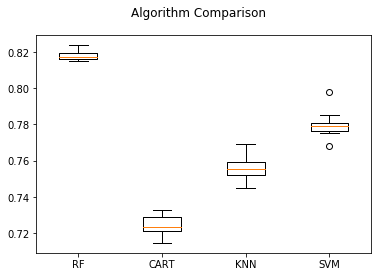

In [87]:
# citation: adapted from https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier #scikit doc says doesn't support categorical variables
from sklearn.neighbors import KNeighborsClassifier #needs scaled data
from sklearn.svm import SVC  #needs scaled data

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

RF is best model, but need to try again with scaled features, esp. for KNN and SVM

## repeat with scaled data to compare results

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
# apply same transformation to test data
x_test_sc = scaler.transform(x_test)

RF: 0.818583 (0.004319)
CART: 0.725167 (0.005858)
KNN: 0.794667 (0.003777)
SVM: 0.819417 (0.003833)


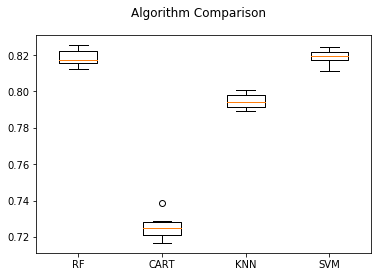

In [89]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, x_train_sc, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Now that features are scaled, RF and SVM are essentially tied in performance (accuracy). Now check if "no category" types affect CART

## repeat with no "category" data types (for DecisionTree/CART) and scaled data to compare results

In [112]:
# Create dataframe and convert all features to non-category
credit_cl_df_int = credit_cl_df.copy()

In [114]:
#change "PAY_0" to int64 data type
convert_dict = {'PAY_0': 'int64'}
credit_cl_df_int = credit_cl_df_int.astype(convert_dict) 
#print(credit_df.dtypes)
#credit_cl_df_int['PAY_0'] = credit_cl_df_int.apply(pd.to_numeric)

In [122]:
credit_cl_df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
LIMIT_BAL             30000 non-null int64
AGE                   30000 non-null int64
PAY_0                 30000 non-null int64
BILL_AMT1             30000 non-null int64
PAY_AMT1              30000 non-null int64
PAY_AMT2              30000 non-null int64
PAY_AMT3              30000 non-null int64
PAY_AMT4              30000 non-null int64
PAY_AMT5              30000 non-null int64
PAY_AMT6              30000 non-null int64
default_next_month    30000 non-null int64
dtypes: int64(11)
memory usage: 2.5 MB


In [115]:
credit_cl_df_int.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,20000,24,2,3913,0,689,0,0,0,0,1
1,120000,26,-1,2682,0,1000,1000,1000,0,2000,1
2,90000,34,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,37,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,57,-1,8617,2000,36681,10000,9000,689,679,0


In [116]:
# Select Features by dropping the dependent variable
features_int = credit_cl_df_int.drop('default_next_month', axis=1)
# Select Dependent Variable
depVar_int = credit_cl_df_int['default_next_month']
# Establish the training set and test set -> 80% train, 20% test
x_train_int,x_test_int,y_train_int,y_test_int=train_test_split(features_int,depVar_int,test_size=0.2)

#scale features using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_int)
x_train_sc_int = scaler.transform(x_train_int)
# apply same transformation to test data
x_test_sc_int = scaler.transform(x_test_int)

In [119]:
y_train_int.head()

27059    1
18785    0
25148    0
26448    1
10099    1
Name: default_next_month, dtype: int64

In [120]:
x_train_int.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
27059,210000,39,-1,600,169,497,15436,170,2000,2822
18785,210000,27,0,16186,1300,1650,1620,700,870,880
25148,150000,28,0,100623,4700,4000,4032,3410,4000,3665
26448,50000,52,0,33743,2000,1400,2000,5000,1000,1000
10099,240000,28,1,0,1748,0,14944,968,10408,0


RF: 0.817250 (0.007505)
CART: 0.717458 (0.008005)
KNN: 0.793375 (0.008031)
SVM: 0.819958 (0.008284)


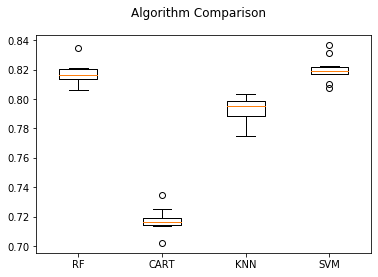

In [121]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, x_train_sc_int, y_train_int, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

No change in CART performance

# Train best models for predictions, run against test set, and compare

In [125]:
#Models
modelRF = RandomForestClassifier()
modelSVM = SVC()

#pass the training data to model variables
modelRF.fit(x_train_sc,y_train)
modelSVM.fit(x_train_sc,y_train)

print('RF model', cross_val_score(modelRF, x_train_sc,y_train ))
print('SVM model', cross_val_score(modelSVM, x_train_sc,y_train))


RF model [0.81208333 0.81625    0.82229167 0.81645833 0.81583333]
SVM model [0.81854167 0.81875    0.82333333 0.82020833 0.8175    ]


Predictions:

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions_RF = modelRF.predict(x_test_sc)
predictions_SVM = modelSVM.predict(x_test_sc)

In [128]:
confusion_matrix(y_test, predictions_RF)

array([[4400,  242],
       [ 894,  464]])

In [129]:
accuracy_score(y_test,predictions_RF)

0.8106666666666666

In [130]:
confusion_matrix(y_test, predictions_SVM)

array([[4476,  166],
       [ 941,  417]])

In [131]:
accuracy_score(y_test,predictions_SVM)

0.8155

Both models performed as well against the test set as they did the training data

# Tune models to try to improve performance

## RandomForestClassifier:

In [134]:
# Look at parameters used by our current forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(modelRF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Use Random Search Cross Validation in Scikit-Learn

Tune these parameters: 
<br> n_estimators = number of trees in the foreset
<br> max_features = max number of features considered for splitting a node
<br> max_depth = max number of levels in each decision tree
<br> min_samples_split = min number of data points placed in a node before the node is split
<br> min_samples_leaf = min number of data points allowed in a leaf node
<br> bootstrap = method for sampling data points (with or without replacement)

In [137]:
#citation: adapted from
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV

#setup the random grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [138]:
# instantiate the random search and fit it like any Scikit-Learn model:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_sc,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 38.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [139]:
#best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

Evaluate Random Search: compare the base model with the best random search model

In [142]:
def evaluate(model, x_test_sc, y_test):
    predictions = model.predict(x_test_sc) 
    accuracy = accuracy_score(y_test,predictions)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train_sc,y_train)
base_accuracy = evaluate(base_model, x_test_sc, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test_sc, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.802%.
Model Performance
Accuracy = 0.816%.
Improvement of 1.70%.


In [175]:
#confusion matrix of the test set
#count of true negatives is C0,0, false negatives is C1,0, true positives is C1,1 and false positives is C0,1.
predictions_BestRF = best_random.predict(x_test_sc)
confusion_matrix(y_test, predictions_BestRF)

array([[4432,  210],
       [ 896,  462]])

In [189]:
#confusion matrix of the full data set
predictions_BestRF = best_random.predict(features)
confusion_matrix(depVar, predictions_BestRF)

array([[22445,   919],
       [ 4530,  2106]])

In [156]:
# save the best model to disk for use later
from joblib import dump, load
dump(best_random, 'BestRFmodel.joblib')

#Note: to load model for future use: ModelName = load('filename.joblib')

['BestRFmodel.joblib']

## SVM

In [144]:
# Look at parameters used by our current SVM
from pprint import pprint
print('Parameters currently in use:\n')
pprint(modelSVM.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [182]:
#perform a grid search of various C and gamma values
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
}
# Create a based model
svm = SVC()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, cv = 3, 
                           n_jobs = -1, scoring='accuracy', verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train_sc,y_train)
grid_search.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.8min finished


{'C': 10, 'gamma': 0.01}

Evaluate SVM

In [183]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test_sc, y_test)

Model Performance
Accuracy = 0.816%.


This is the same accuracy as the "out of box" model...

In [184]:
#confusion matrix of the test set
#count of true negatives is C0,0, false negatives is C1,0, true positives is C1,1 and false positives is C0,1.
predictions_BestSVM = best_grid.predict(x_test_sc)
confusion_matrix(y_test, predictions_BestSVM)

array([[4474,  168],
       [ 939,  419]])

In [188]:
#confusion matrix of the full data set
features_sc = scaler.transform(features)
predictions_BestSVM = best_grid.predict(features_sc)
confusion_matrix(depVar, predictions_BestSVM)

array([[22485,   879],
       [ 4546,  2090]])

In [157]:
# save the best model to disk for use later
from joblib import dump, load
dump(best_grid, 'BestSVMmodel.joblib')

['BestSVMmodel.joblib']

# Conclusions

After Tuning; RandomForestClassifier() and SVC() provided the same accuracy of 81.6%. Recommend using the RandomForestClassifier() since it's easier to implement - doesn't need scaled feature data.

Recommend use RandomForestClassifier() with these parameters:
<br>{'n_estimators': 400,
<br> 'min_samples_split': 10,
<br> 'min_samples_leaf': 4,
<br> 'max_features': 'auto',
<br> 'max_depth': 70,
<br> 'bootstrap': True}

# APPENDIX / EXTRA CODE FOR REFERENCE

In [ ]:
#pass the training data to model variables
modelRF.fit(x_train,y_train)
print(cross_val_score(modelRF, x_train, y_train))
modelRF.score(x_train,y_train)  # Returns the coefficient of determination R^2 of the prediction.

# Make Predictions

In [ ]:
predictions = modelRF.predict(x_test)

# Evaluate Results

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
accuracy_score(y_test,predictions)